In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns

In [2]:
df = pd.read_csv(r'/data/users/dverma01/colab/adni/Merged_clean1_310.csv',index_col=0)

In [3]:
df.shape

(1349, 151)

In [4]:
df.head()

,names,l3thVen,r3thVen,l4thVen,r4thVen,lAcc,rAcc,lAmy,rAmy,lBst,...,lTemTraGy,rTemTraGy,Classifier,AGE,PTGENDER,Hippocampus.bl,WholeBrain.bl,Entorhinal.bl,Fusiform.bl,MidTemp.bl
0,002_S_5018,0.0375,0.0335,0.0714,0.0686,0.3669,0.3540,0.6013,0.7083,0.2747,...,1.1541,1.0597,AD,73.3,Male,7431,1.077908e+06,2910,18214,18684
1,003_S_4152,0.0384,0.0340,0.0671,0.0672,0.3147,0.3206,0.6352,0.7062,0.5595,...,1.1327,0.9901,AD,60.7,Male,6696,1.004905e+06,3120,16872,15846
2,003_S_4373,0.0196,0.0165,0.0506,0.0587,0.1784,0.1950,0.4251,0.4827,0.4255,...,0.6465,0.5112,AD,71.1,Female,5458,7.545074e+05,2136,11897,12577
3,003_S_4892,0.0230,0.0191,0.0477,0.0597,0.3344,0.3376,0.6638,0.7090,0.8452,...,1.1333,0.8846,AD,75.1,Female,6726,9.486256e+05,3128,15315,17518
4,003_S_5165,0.0303,0.0161,0.0333,0.0511,0.2932,0.3143,0.7388,0.6866,0.9777,...,1.2027,0.7114,AD,78.8,Male,6269,1.107883e+06,3739,17495,19446


In [5]:
df['Classifier'].value_counts()

AD     487
MCI    438
CN     424
Name: Classifier, dtype: int64

In [6]:
df.columns.tolist()

['names',
 'l3thVen',
 'r3thVen',
 'l4thVen',
 'r4thVen',
 'lAcc',
 'rAcc',
 'lAmy',
 'rAmy',
 'lBst',
 'rBst',
 'lCau',
 'rCau',
 'lExtCbe',
 'rExtCbe',
 'lCbeWM',
 'rCbeWM',
 'lCbrWM',
 'rCbrWM',
 'lCSF',
 'rCSF',
 'lHip',
 'rHip',
 'lInfLatVen',
 'rInfLatVen',
 'lLatVen',
 'rLatVen',
 'lPal',
 'rPal',
 'lPut',
 'rPut',
 'lThaPro',
 'rThaPro',
 'lVenVen',
 'rVenVen',
 'lOC',
 'rOC',
 'lCbeLoCbe1-5',
 'rCbeLoCbe1-5',
 'lCbeLoCbe6-7',
 'rCbeLoCbe6-7',
 'lCbeLoCbe8-10',
 'rCbeLoCbe8-10',
 'lBasCbr+FobBr',
 'rBasCbr+FobBr',
 'lAntCinGy',
 'rAntCinGy',
 'lAntIns',
 'rAntIns',
 'lAntOrbGy',
 'rAntOrbGy',
 'lAngGy',
 'rAngGy',
 'lCal+Cbr',
 'rCal+Cbr',
 'lCenOpe',
 'rCenOpe',
 'lCun',
 'rCun',
 'lEnt',
 'rEnt',
 'lFroOpe',
 'rFroOpe',
 'lFroPo',
 'rFroPo',
 'lFusGy',
 'rFusGy',
 'lRecGy',
 'rRecGy',
 'lInfOccGy',
 'rInfOccGy',
 'lInfTemGy',
 'rInfTemGy',
 'lLinGy',
 'rLinGy',
 'lLatOrbGy',
 'rLatOrbGy',
 'lMidCinGy',
 'rMidCinGy',
 'lMedFroCbr',
 'rMedFroCbr',
 'lMidFroGy',
 'rMidFroGy',
 '

In [7]:
df['PTGENDER'] = df['PTGENDER'].map({'Female':1, 'Male':0})

In [8]:
df.head()

,names,l3thVen,r3thVen,l4thVen,r4thVen,lAcc,rAcc,lAmy,rAmy,lBst,...,lTemTraGy,rTemTraGy,Classifier,AGE,PTGENDER,Hippocampus.bl,WholeBrain.bl,Entorhinal.bl,Fusiform.bl,MidTemp.bl
0,002_S_5018,0.0375,0.0335,0.0714,0.0686,0.3669,0.3540,0.6013,0.7083,0.2747,...,1.1541,1.0597,AD,73.3,0,7431,1.077908e+06,2910,18214,18684
1,003_S_4152,0.0384,0.0340,0.0671,0.0672,0.3147,0.3206,0.6352,0.7062,0.5595,...,1.1327,0.9901,AD,60.7,0,6696,1.004905e+06,3120,16872,15846
2,003_S_4373,0.0196,0.0165,0.0506,0.0587,0.1784,0.1950,0.4251,0.4827,0.4255,...,0.6465,0.5112,AD,71.1,1,5458,7.545074e+05,2136,11897,12577
3,003_S_4892,0.0230,0.0191,0.0477,0.0597,0.3344,0.3376,0.6638,0.7090,0.8452,...,1.1333,0.8846,AD,75.1,1,6726,9.486256e+05,3128,15315,17518
4,003_S_5165,0.0303,0.0161,0.0333,0.0511,0.2932,0.3143,0.7388,0.6866,0.9777,...,1.2027,0.7114,AD,78.8,0,6269,1.107883e+06,3739,17495,19446


# Data Visualization

In [9]:
df_AD = df[df['Classifier']=='AD']

In [10]:
df_AD.shape

(487, 151)

In [11]:
df_AD_v = df_AD.drop(columns=['names','Classifier'])

In [12]:
df_MCI = df[df['Classifier']=='MCI']

In [13]:
df_MCI.shape

(438, 151)

In [14]:
df_CN = df[df['Classifier']=='CN']

In [15]:
df_CN.shape

(424, 151)

<AxesSubplot:xlabel='lCbeWM', ylabel='Classifier'>

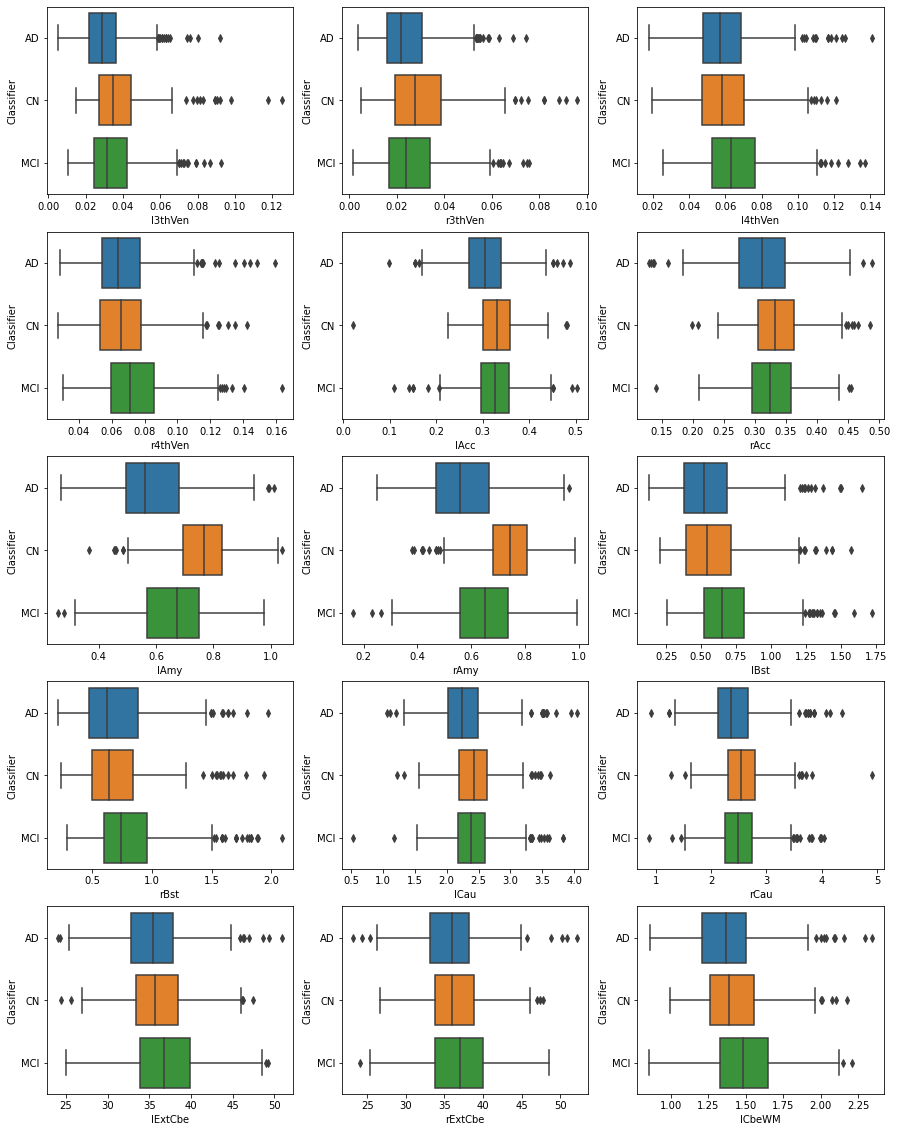

In [16]:
fig, axs = plt.subplots(5,3, figsize=(15,20))
sns.boxplot(data=df, x=df['l3thVen'], y=df['Classifier'], ax = axs[0,0])
sns.boxplot(data=df, x=df['r3thVen'], y=df['Classifier'], ax = axs[0,1])
sns.boxplot(data=df, x=df['l4thVen'], y=df['Classifier'], ax = axs[0,2])
sns.boxplot(data=df, x=df['r4thVen'], y=df['Classifier'], ax = axs[1,0])
sns.boxplot(data=df, x=df['lAcc'], y=df['Classifier'], ax = axs[1,1])
sns.boxplot(data=df, x=df['rAcc'], y=df['Classifier'], ax = axs[1,2])
sns.boxplot(data=df, x=df['lAmy'], y=df['Classifier'], ax = axs[2,0])
sns.boxplot(data=df, x=df['rAmy'], y=df['Classifier'], ax = axs[2,1])
sns.boxplot(data=df, x=df['lBst'], y=df['Classifier'], ax = axs[2,2])
sns.boxplot(data=df, x=df['rBst'], y=df['Classifier'], ax = axs[3,0])
sns.boxplot(data=df, x=df['lCau'], y=df['Classifier'], ax = axs[3,1])
sns.boxplot(data=df, x=df['rCau'], y=df['Classifier'], ax = axs[3,2])
sns.boxplot(data=df, x=df['lExtCbe'], y=df['Classifier'], ax = axs[4,0])
sns.boxplot(data=df, x=df['rExtCbe'], y=df['Classifier'], ax = axs[4,1])
sns.boxplot(data=df, x=df['lCbeWM'], y=df['Classifier'], ax = axs[4,2])

<AxesSubplot:xlabel='rPut', ylabel='Classifier'>

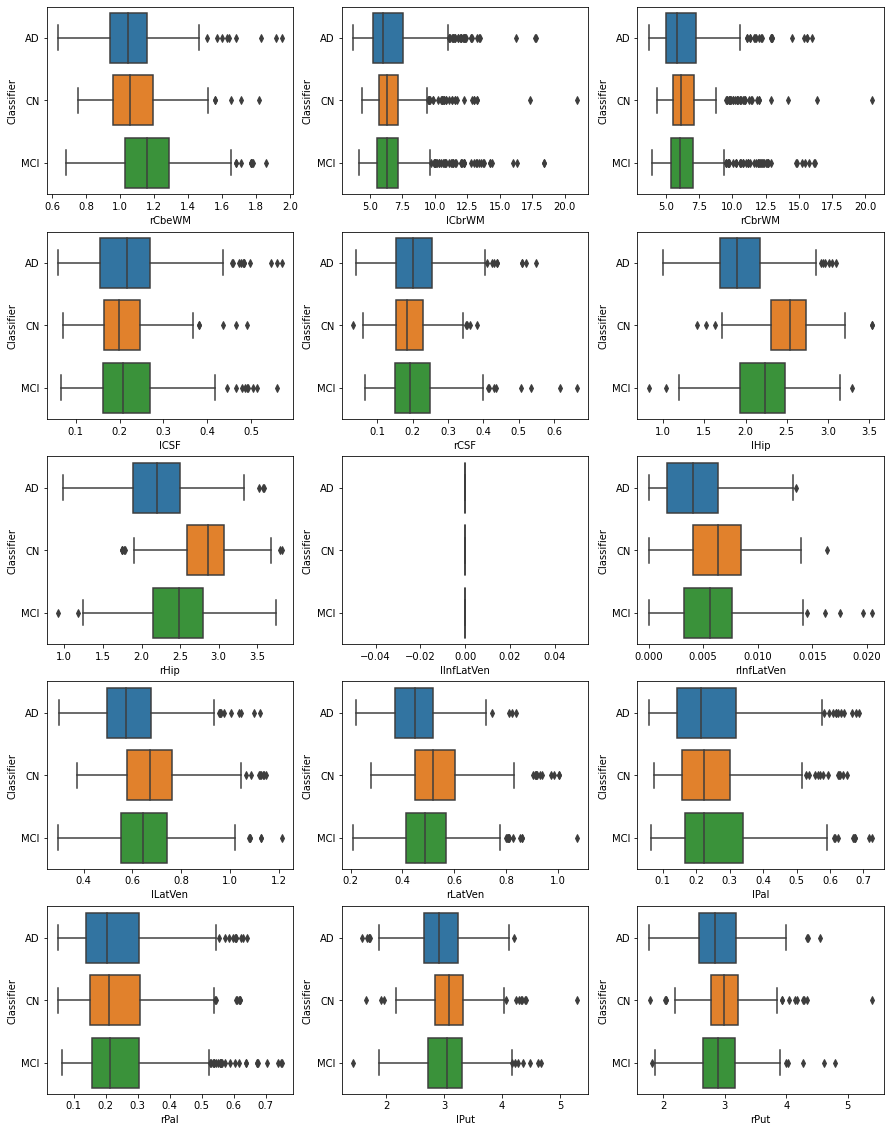

In [17]:
fig, axs = plt.subplots(5,3, figsize=(15,20))
sns.boxplot(data=df, x=df['rCbeWM'], y=df['Classifier'], ax = axs[0,0])
sns.boxplot(data=df, x=df['lCbrWM'], y=df['Classifier'], ax = axs[0,1])
sns.boxplot(data=df, x=df['rCbrWM'], y=df['Classifier'], ax = axs[0,2])
sns.boxplot(data=df, x=df['lCSF'], y=df['Classifier'], ax = axs[1,0])
sns.boxplot(data=df, x=df['rCSF'], y=df['Classifier'], ax = axs[1,1])
sns.boxplot(data=df, x=df['lHip'], y=df['Classifier'], ax = axs[1,2])
sns.boxplot(data=df, x=df['rHip'], y=df['Classifier'], ax = axs[2,0])
sns.boxplot(data=df, x=df['lInfLatVen'], y=df['Classifier'], ax = axs[2,1])
sns.boxplot(data=df, x=df['rInfLatVen'], y=df['Classifier'], ax = axs[2,2])
sns.boxplot(data=df, x=df['lLatVen'], y=df['Classifier'], ax = axs[3,0])
sns.boxplot(data=df, x=df['rLatVen'], y=df['Classifier'], ax = axs[3,1])
sns.boxplot(data=df, x=df['lPal'], y=df['Classifier'], ax = axs[3,2])
sns.boxplot(data=df, x=df['rPal'], y=df['Classifier'], ax = axs[4,0])
sns.boxplot(data=df, x=df['lPut'], y=df['Classifier'], ax = axs[4,1])
sns.boxplot(data=df, x=df['rPut'], y=df['Classifier'], ax = axs[4,2])

<AxesSubplot:xlabel='lAntCinGy', ylabel='Classifier'>

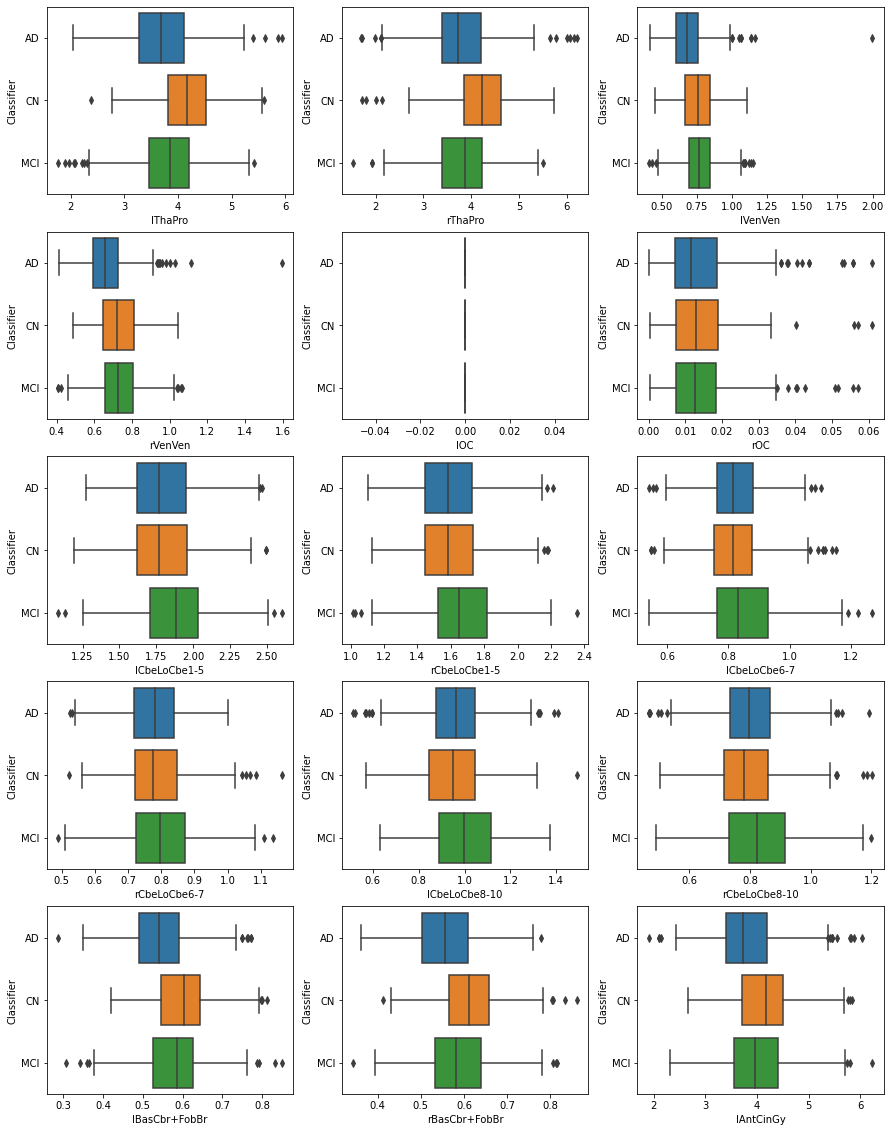

In [18]:
fig, axs = plt.subplots(5,3, figsize=(15,20))
sns.boxplot(data=df, x=df['lThaPro'], y=df['Classifier'], ax = axs[0,0])
sns.boxplot(data=df, x=df['rThaPro'], y=df['Classifier'], ax = axs[0,1])
sns.boxplot(data=df, x=df['lVenVen'], y=df['Classifier'], ax = axs[0,2])
sns.boxplot(data=df, x=df['rVenVen'], y=df['Classifier'], ax = axs[1,0])
sns.boxplot(data=df, x=df['lOC'], y=df['Classifier'], ax = axs[1,1])
sns.boxplot(data=df, x=df['rOC'], y=df['Classifier'], ax = axs[1,2])
sns.boxplot(data=df, x=df['lCbeLoCbe1-5'], y=df['Classifier'], ax = axs[2,0])
sns.boxplot(data=df, x=df['rCbeLoCbe1-5'], y=df['Classifier'], ax = axs[2,1])
sns.boxplot(data=df, x=df['lCbeLoCbe6-7'], y=df['Classifier'], ax = axs[2,2])
sns.boxplot(data=df, x=df['rCbeLoCbe6-7'], y=df['Classifier'], ax = axs[3,0])
sns.boxplot(data=df, x=df['lCbeLoCbe8-10'], y=df['Classifier'], ax = axs[3,1])
sns.boxplot(data=df, x=df['rCbeLoCbe8-10'], y=df['Classifier'], ax = axs[3,2])
sns.boxplot(data=df, x=df['lBasCbr+FobBr'], y=df['Classifier'], ax = axs[4,0])
sns.boxplot(data=df, x=df['rBasCbr+FobBr'], y=df['Classifier'], ax = axs[4,1])
sns.boxplot(data=df, x=df['lAntCinGy'], y=df['Classifier'], ax = axs[4,2])

<AxesSubplot:xlabel='rFroOpe', ylabel='Classifier'>

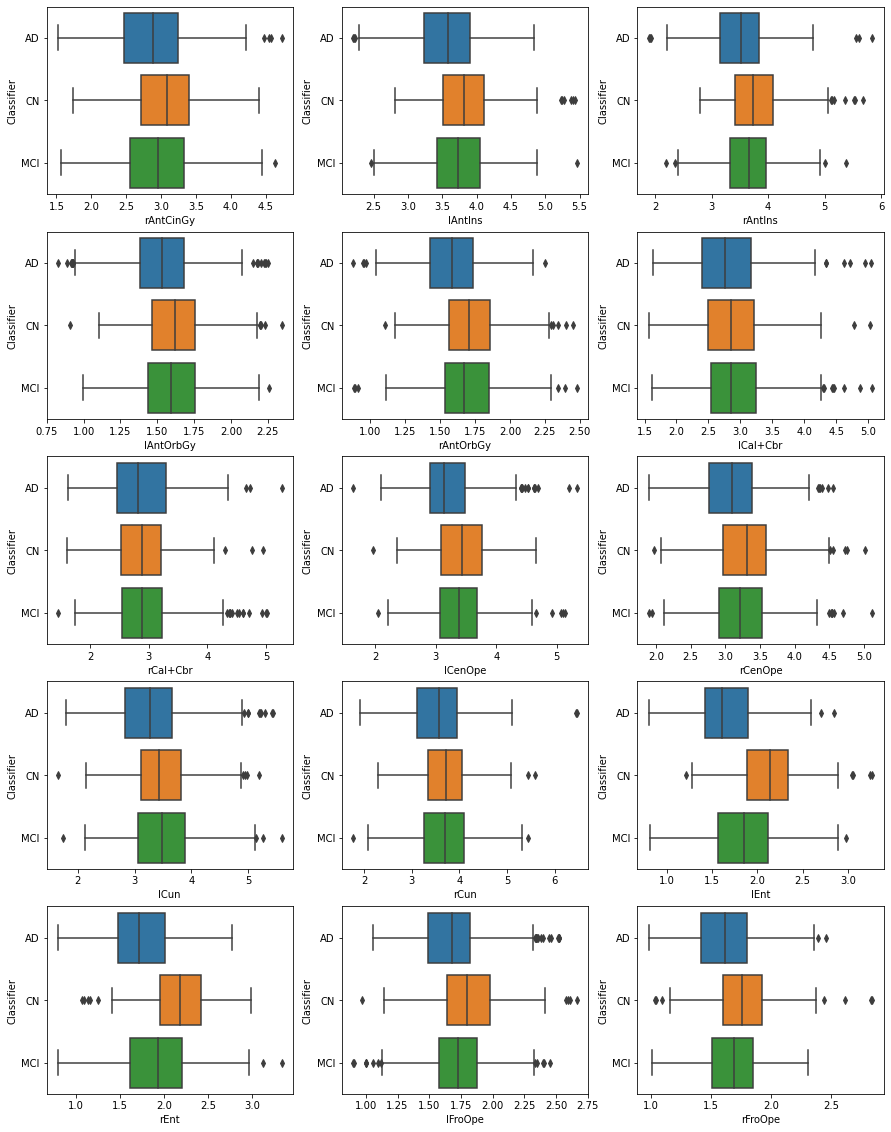

In [19]:
fig, axs = plt.subplots(5,3, figsize=(15,20))
sns.boxplot(data=df, x=df['rAntCinGy'], y=df['Classifier'], ax = axs[0,0])
sns.boxplot(data=df, x=df['lAntIns'], y=df['Classifier'], ax = axs[0,1])
sns.boxplot(data=df, x=df['rAntIns'], y=df['Classifier'], ax = axs[0,2])
sns.boxplot(data=df, x=df['lAntOrbGy'], y=df['Classifier'], ax = axs[1,0])
sns.boxplot(data=df, x=df['rAntOrbGy'], y=df['Classifier'], ax = axs[1,1])
sns.boxplot(data=df, x=df['lCal+Cbr'], y=df['Classifier'], ax = axs[1,2])
sns.boxplot(data=df, x=df['rCal+Cbr'], y=df['Classifier'], ax = axs[2,0])
sns.boxplot(data=df, x=df['lCenOpe'], y=df['Classifier'], ax = axs[2,1])
sns.boxplot(data=df, x=df['rCenOpe'], y=df['Classifier'], ax = axs[2,2])
sns.boxplot(data=df, x=df['lCun'], y=df['Classifier'], ax = axs[3,0])
sns.boxplot(data=df, x=df['rCun'], y=df['Classifier'], ax = axs[3,1])
sns.boxplot(data=df, x=df['lEnt'], y=df['Classifier'], ax = axs[3,2])
sns.boxplot(data=df, x=df['rEnt'], y=df['Classifier'], ax = axs[4,0])
sns.boxplot(data=df, x=df['lFroOpe'], y=df['Classifier'], ax = axs[4,1])
sns.boxplot(data=df, x=df['rFroOpe'], y=df['Classifier'], ax = axs[4,2])

<AxesSubplot:xlabel='lMidCinGy', ylabel='Classifier'>

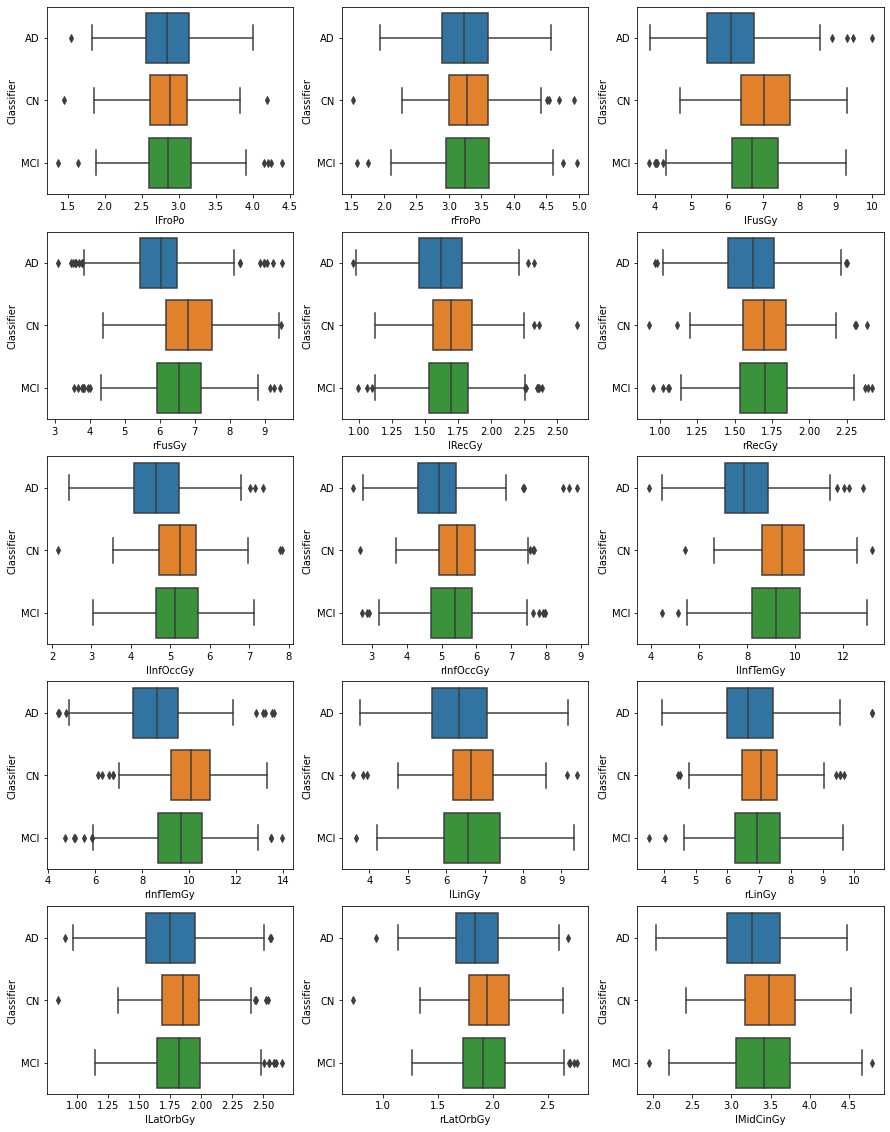

In [20]:
fig, axs = plt.subplots(5,3, figsize=(15,20))
sns.boxplot(data=df, x=df['lFroPo'], y=df['Classifier'], ax = axs[0,0])
sns.boxplot(data=df, x=df['rFroPo'], y=df['Classifier'], ax = axs[0,1])
sns.boxplot(data=df, x=df['lFusGy'], y=df['Classifier'], ax = axs[0,2])
sns.boxplot(data=df, x=df['rFusGy'], y=df['Classifier'], ax = axs[1,0])
sns.boxplot(data=df, x=df['lRecGy'], y=df['Classifier'], ax = axs[1,1])
sns.boxplot(data=df, x=df['rRecGy'], y=df['Classifier'], ax = axs[1,2])
sns.boxplot(data=df, x=df['lInfOccGy'], y=df['Classifier'], ax = axs[2,0])
sns.boxplot(data=df, x=df['rInfOccGy'], y=df['Classifier'], ax = axs[2,1])
sns.boxplot(data=df, x=df['lInfTemGy'], y=df['Classifier'], ax = axs[2,2])
sns.boxplot(data=df, x=df['rInfTemGy'], y=df['Classifier'], ax = axs[3,0])
sns.boxplot(data=df, x=df['lLinGy'], y=df['Classifier'], ax = axs[3,1])
sns.boxplot(data=df, x=df['rLinGy'], y=df['Classifier'], ax = axs[3,2])
sns.boxplot(data=df, x=df['lLatOrbGy'], y=df['Classifier'], ax = axs[4,0])
sns.boxplot(data=df, x=df['rLatOrbGy'], y=df['Classifier'], ax = axs[4,1])
sns.boxplot(data=df, x=df['lMidCinGy'], y=df['Classifier'], ax = axs[4,2])

<AxesSubplot:xlabel='rSupMedFroGy', ylabel='Classifier'>

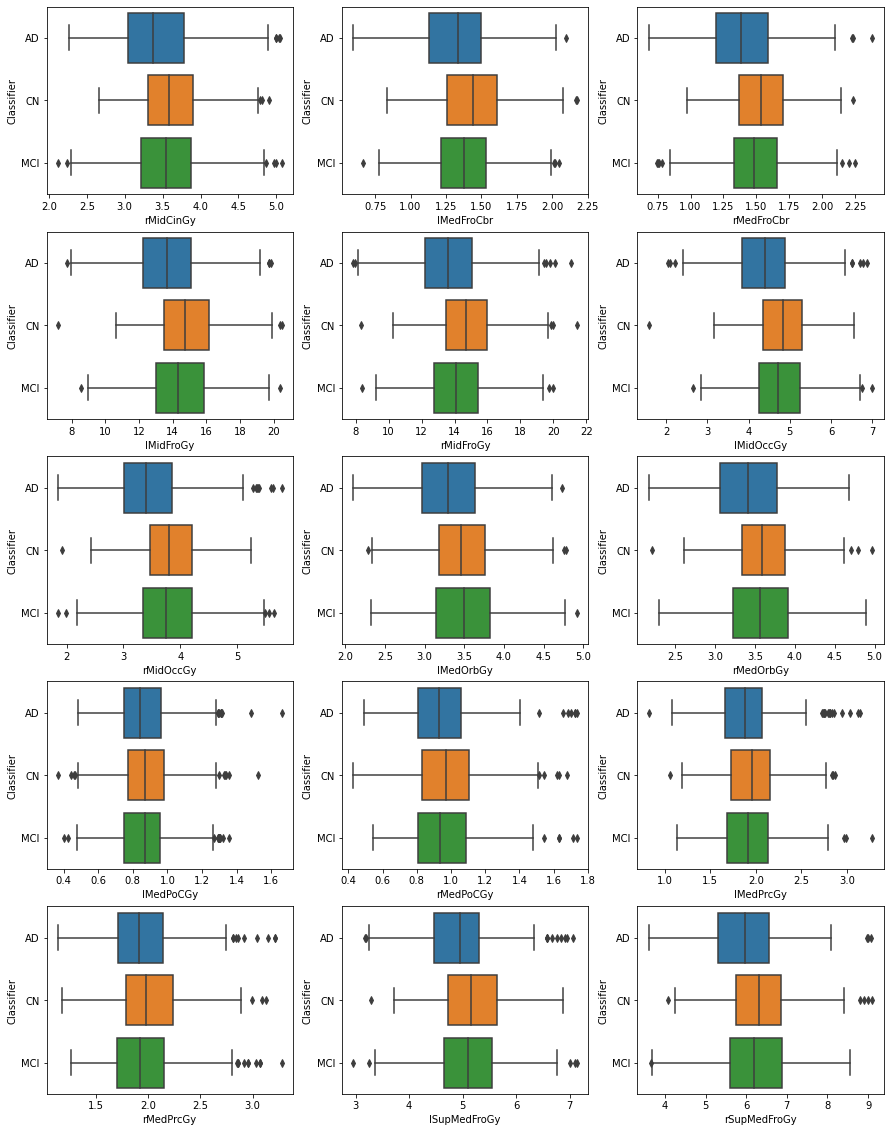

In [21]:
fig, axs = plt.subplots(5,3, figsize=(15,20))
sns.boxplot(data=df, x=df['rMidCinGy'], y=df['Classifier'], ax = axs[0,0])
sns.boxplot(data=df, x=df['lMedFroCbr'], y=df['Classifier'], ax = axs[0,1])
sns.boxplot(data=df, x=df['rMedFroCbr'], y=df['Classifier'], ax = axs[0,2])
sns.boxplot(data=df, x=df['lMidFroGy'], y=df['Classifier'], ax = axs[1,0])
sns.boxplot(data=df, x=df['rMidFroGy'], y=df['Classifier'], ax = axs[1,1])
sns.boxplot(data=df, x=df['lMidOccGy'], y=df['Classifier'], ax = axs[1,2])
sns.boxplot(data=df, x=df['rMidOccGy'], y=df['Classifier'], ax = axs[2,0])
sns.boxplot(data=df, x=df['lMedOrbGy'], y=df['Classifier'], ax = axs[2,1])
sns.boxplot(data=df, x=df['rMedOrbGy'], y=df['Classifier'], ax = axs[2,2])
sns.boxplot(data=df, x=df['lMedPoCGy'], y=df['Classifier'], ax = axs[3,0])
sns.boxplot(data=df, x=df['rMedPoCGy'], y=df['Classifier'], ax = axs[3,1])
sns.boxplot(data=df, x=df['lMedPrcGy'], y=df['Classifier'], ax = axs[3,2])
sns.boxplot(data=df, x=df['rMedPrcGy'], y=df['Classifier'], ax = axs[4,0])
sns.boxplot(data=df, x=df['lSupMedFroGy'], y=df['Classifier'], ax = axs[4,1])
sns.boxplot(data=df, x=df['rSupMedFroGy'], y=df['Classifier'], ax = axs[4,2])

<AxesSubplot:xlabel='lParHipGy', ylabel='Classifier'>

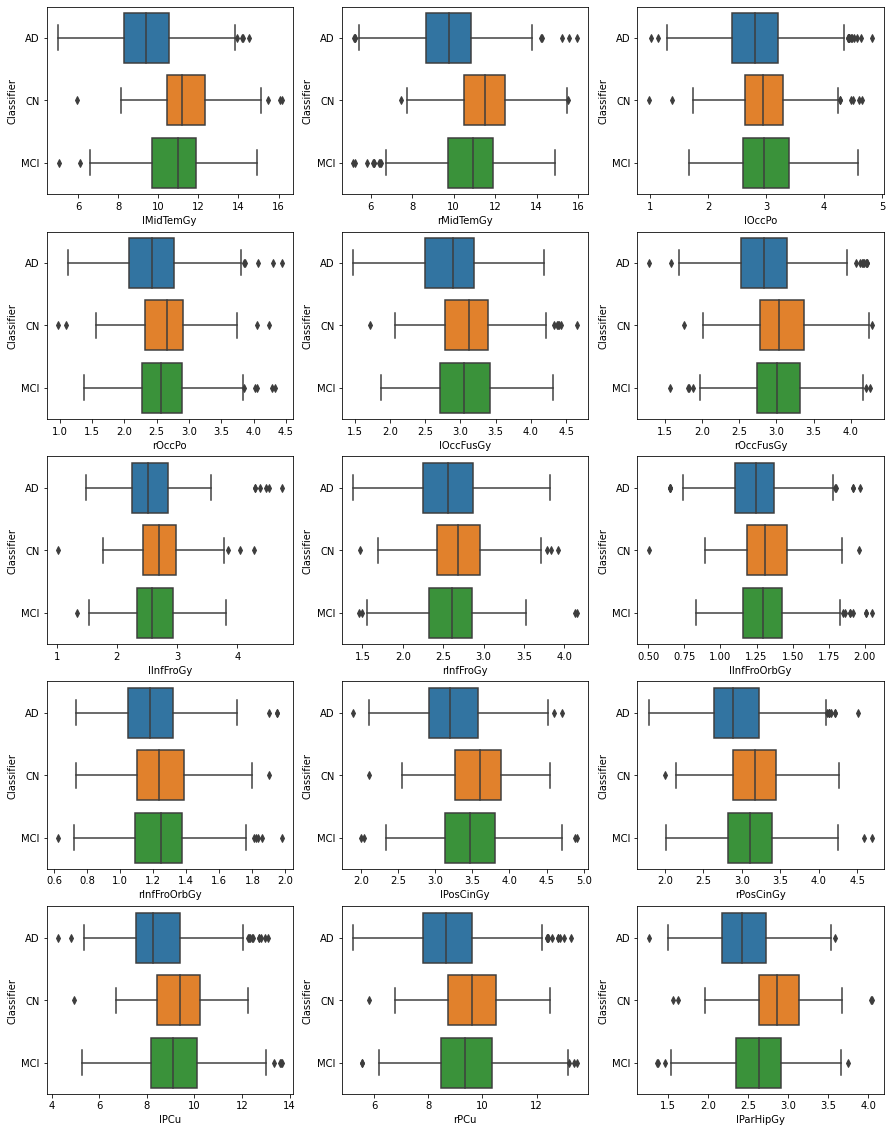

In [22]:
fig, axs = plt.subplots(5,3, figsize=(15,20))
sns.boxplot(data=df, x=df['lMidTemGy'], y=df['Classifier'], ax = axs[0,0])
sns.boxplot(data=df, x=df['rMidTemGy'], y=df['Classifier'], ax = axs[0,1])
sns.boxplot(data=df, x=df['lOccPo'], y=df['Classifier'], ax = axs[0,2])
sns.boxplot(data=df, x=df['rOccPo'], y=df['Classifier'], ax = axs[1,0])
sns.boxplot(data=df, x=df['lOccFusGy'], y=df['Classifier'], ax = axs[1,1])
sns.boxplot(data=df, x=df['rOccFusGy'], y=df['Classifier'], ax = axs[1,2])
sns.boxplot(data=df, x=df['lInfFroGy'], y=df['Classifier'], ax = axs[2,0])
sns.boxplot(data=df, x=df['rInfFroGy'], y=df['Classifier'], ax = axs[2,1])
sns.boxplot(data=df, x=df['lInfFroOrbGy'], y=df['Classifier'], ax = axs[2,2])
sns.boxplot(data=df, x=df['rInfFroOrbGy'], y=df['Classifier'], ax = axs[3,0])
sns.boxplot(data=df, x=df['lPosCinGy'], y=df['Classifier'], ax = axs[3,1])
sns.boxplot(data=df, x=df['rPosCinGy'], y=df['Classifier'], ax = axs[3,2])
sns.boxplot(data=df, x=df['lPCu'], y=df['Classifier'], ax = axs[4,0])
sns.boxplot(data=df, x=df['rPCu'], y=df['Classifier'], ax = axs[4,1])
sns.boxplot(data=df, x=df['lParHipGy'], y=df['Classifier'], ax = axs[4,2])

<AxesSubplot:xlabel='rTem', ylabel='Classifier'>

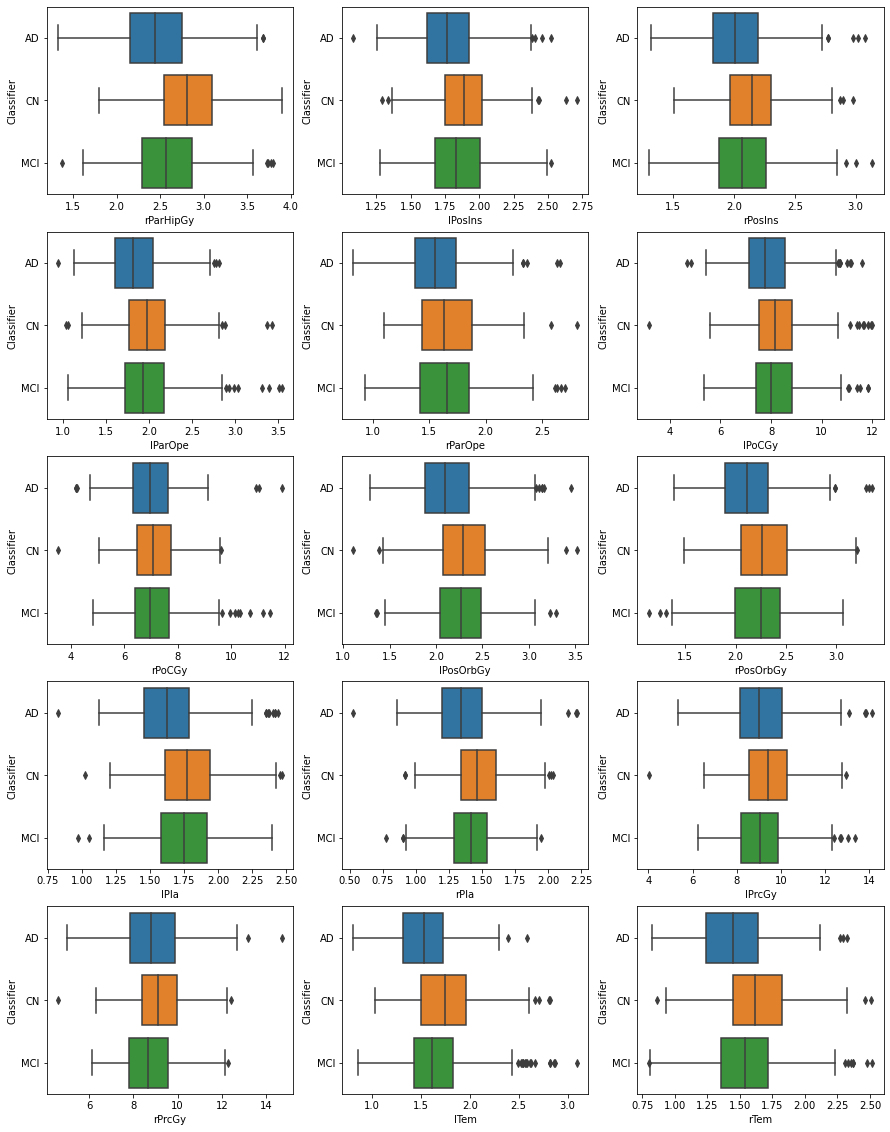

In [23]:
fig, axs = plt.subplots(5,3, figsize=(15,20))
sns.boxplot(data=df, x=df['rParHipGy'], y=df['Classifier'], ax = axs[0,0])
sns.boxplot(data=df, x=df['lPosIns'], y=df['Classifier'], ax = axs[0,1])
sns.boxplot(data=df, x=df['rPosIns'], y=df['Classifier'], ax = axs[0,2])
sns.boxplot(data=df, x=df['lParOpe'], y=df['Classifier'], ax = axs[1,0])
sns.boxplot(data=df, x=df['rParOpe'], y=df['Classifier'], ax = axs[1,1])
sns.boxplot(data=df, x=df['lPoCGy'], y=df['Classifier'], ax = axs[1,2])
sns.boxplot(data=df, x=df['rPoCGy'], y=df['Classifier'], ax = axs[2,0])
sns.boxplot(data=df, x=df['lPosOrbGy'], y=df['Classifier'], ax = axs[2,1])
sns.boxplot(data=df, x=df['rPosOrbGy'], y=df['Classifier'], ax = axs[2,2])
sns.boxplot(data=df, x=df['lPla'], y=df['Classifier'], ax = axs[3,0])
sns.boxplot(data=df, x=df['rPla'], y=df['Classifier'], ax = axs[3,1])
sns.boxplot(data=df, x=df['lPrcGy'], y=df['Classifier'], ax = axs[3,2])
sns.boxplot(data=df, x=df['rPrcGy'], y=df['Classifier'], ax = axs[4,0])
sns.boxplot(data=df, x=df['lTem'], y=df['Classifier'], ax = axs[4,1])
sns.boxplot(data=df, x=df['rTem'], y=df['Classifier'], ax = axs[4,2])

<AxesSubplot:xlabel='lTemPo', ylabel='Classifier'>

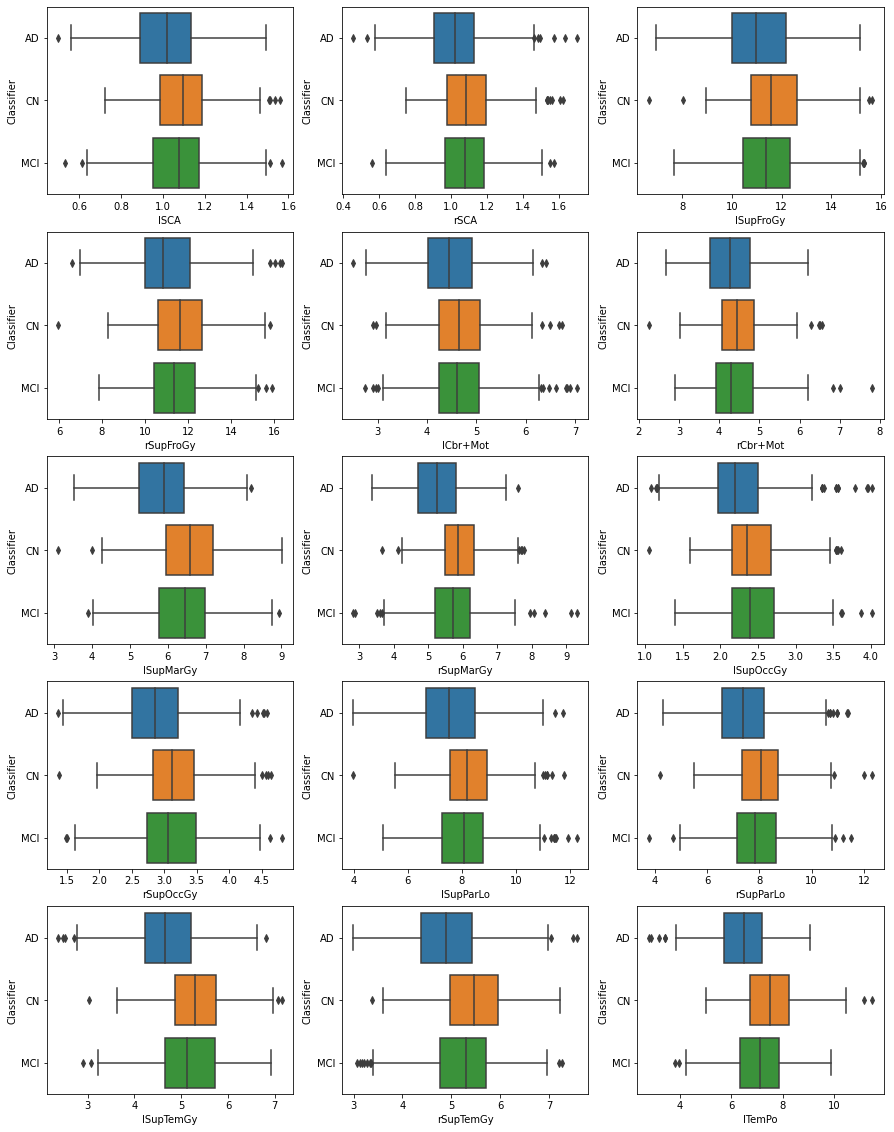

In [24]:
fig, axs = plt.subplots(5,3, figsize=(15,20))
sns.boxplot(data=df, x=df['lSCA'], y=df['Classifier'], ax = axs[0,0])
sns.boxplot(data=df, x=df['rSCA'], y=df['Classifier'], ax = axs[0,1])
sns.boxplot(data=df, x=df['lSupFroGy'], y=df['Classifier'], ax = axs[0,2])
sns.boxplot(data=df, x=df['rSupFroGy'], y=df['Classifier'], ax = axs[1,0])
sns.boxplot(data=df, x=df['lCbr+Mot'], y=df['Classifier'], ax = axs[1,1])
sns.boxplot(data=df, x=df['rCbr+Mot'], y=df['Classifier'], ax = axs[1,2])
sns.boxplot(data=df, x=df['lSupMarGy'], y=df['Classifier'], ax = axs[2,0])
sns.boxplot(data=df, x=df['rSupMarGy'], y=df['Classifier'], ax = axs[2,1])
sns.boxplot(data=df, x=df['lSupOccGy'], y=df['Classifier'], ax = axs[2,2])
sns.boxplot(data=df, x=df['rSupOccGy'], y=df['Classifier'], ax = axs[3,0])
sns.boxplot(data=df, x=df['lSupParLo'], y=df['Classifier'], ax = axs[3,1])
sns.boxplot(data=df, x=df['rSupParLo'], y=df['Classifier'], ax = axs[3,2])
sns.boxplot(data=df, x=df['lSupTemGy'], y=df['Classifier'], ax = axs[4,0])
sns.boxplot(data=df, x=df['rSupTemGy'], y=df['Classifier'], ax = axs[4,1])
sns.boxplot(data=df, x=df['lTemPo'], y=df['Classifier'], ax = axs[4,2])

<AxesSubplot:xlabel='MidTemp.bl', ylabel='Classifier'>

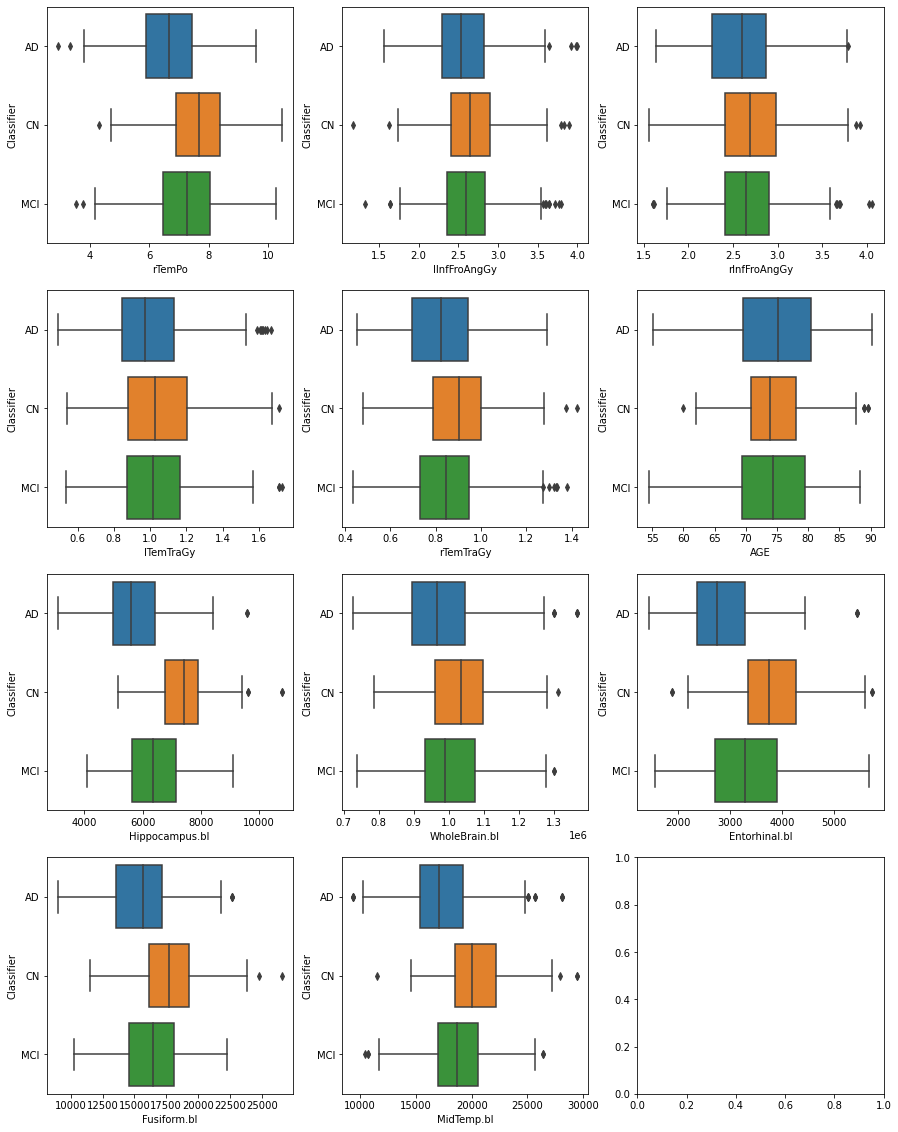

In [25]:
fig, axs = plt.subplots(4,3, figsize=(15,20))
sns.boxplot(data=df, x=df['rTemPo'], y=df['Classifier'], ax = axs[0,0])
sns.boxplot(data=df, x=df['lInfFroAngGy'], y=df['Classifier'], ax = axs[0,1])
sns.boxplot(data=df, x=df['rInfFroAngGy'], y=df['Classifier'], ax = axs[0,2])
sns.boxplot(data=df, x=df['lTemTraGy'], y=df['Classifier'], ax = axs[1,0])
sns.boxplot(data=df, x=df['rTemTraGy'], y=df['Classifier'], ax = axs[1,1])
sns.boxplot(data=df, x=df['AGE'], y=df['Classifier'], ax = axs[1,2])
sns.boxplot(data=df, x=df['Hippocampus.bl'], y=df['Classifier'], ax = axs[2,0])
sns.boxplot(data=df, x=df['WholeBrain.bl'], y=df['Classifier'], ax = axs[2,1])
sns.boxplot(data=df, x=df['Entorhinal.bl'], y=df['Classifier'], ax = axs[2,2])
sns.boxplot(data=df, x=df['Fusiform.bl'], y=df['Classifier'], ax = axs[3,0])
sns.boxplot(data=df, x=df['MidTemp.bl'], y=df['Classifier'], ax = axs[3,1])

# ANOVA Testing

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi

In [27]:
model_Hip = ols('lHip ~ C(Classifier)', data=df).fit()
anova_table_Hip = sm.stats.anova_lm(model_Hip)
anova_table_Hip

,df,sum_sq,mean_sq,F,PR(>F)
C(Classifier),2.0,74.649455,37.324727,289.958339,1.933267e-105
Residual,1346.0,173.263109,0.128724,NaN,NaN


# Find out which pair of treatments are significantly different from each other

In [28]:
mclHip = multi.MultiComparison(df['lHip'], df['Classifier'])
results_lHip = mclHip.tukeyhsd()
print(results_lHip.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
    AD     CN   0.5739 0.001  0.518  0.6298   True
    AD    MCI   0.2642 0.001 0.2088  0.3197   True
    CN    MCI  -0.3096 0.001 -0.367 -0.2523   True
--------------------------------------------------


In [29]:
model_Occ = ols("lOccPo ~ Classifier", data=df).fit()
anova_table_Occ = sm.stats.anova_lm(model_Occ)
anova_table_Occ

,df,sum_sq,mean_sq,F,PR(>F)
Classifier,2.0,9.490633,4.745317,14.358477,6.757437e-07
Residual,1346.0,444.838007,0.330489,NaN,NaN


In [30]:
mclOcc = multi.MultiComparison(df['lOccPo'], df['Classifier'])
results_lOcc = mclOcc.tukeyhsd()
print(results_lOcc.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    AD     CN   0.1437  0.001  0.0541 0.2333   True
    AD    MCI   0.1944  0.001  0.1056 0.2832   True
    CN    MCI   0.0507 0.4006 -0.0412 0.1426  False
---------------------------------------------------


In [31]:
model_lAmy = ols("lAmy ~ Classifier", data=df).fit()
anova_table_lAmy = sm.stats.anova_lm(model_lAmy)
anova_table_lAmy

,df,sum_sq,mean_sq,F,PR(>F)
Classifier,2.0,6.939212,3.469606,225.448822,3.573698e-85
Residual,1346.0,20.714634,0.015390,NaN,NaN


In [32]:
mclAmy = multi.MultiComparison(df['lAmy'], df['Classifier'])
results_lAmy = mclAmy.tukeyhsd()
print(results_lAmy.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    AD     CN    0.175 0.001  0.1556  0.1943   True
    AD    MCI   0.0804 0.001  0.0612  0.0996   True
    CN    MCI  -0.0946 0.001 -0.1144 -0.0747   True
---------------------------------------------------


In [33]:
model_Fro = ols("rFroPo ~ Classifier", data=df).fit()
anova_table_Fro = sm.stats.anova_lm(model_Fro)
anova_table_Fro

,df,sum_sq,mean_sq,F,PR(>F)
Classifier,2.0,1.061130,0.530565,2.171113,0.11445
Residual,1346.0,328.928294,0.244375,NaN,NaN


In [34]:
mclFro = multi.MultiComparison(df['rFroPo'], df['Classifier'])
results_Fro = mclFro.tukeyhsd()
print(results_Fro.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    AD     CN    0.067 0.1032 -0.0101  0.144  False
    AD    MCI   0.0434 0.3782  -0.033 0.1198  False
    CN    MCI  -0.0236 0.7432 -0.1026 0.0554  False
---------------------------------------------------


# Models

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

In [36]:
target = 'Classifier'

In [37]:
df.shape

(1349, 151)

# 40 Features

In [38]:
features_40 = ['lHip','Entorhinal.bl','Hippocampus.bl','lMidTemGy','lInfTemGy',
    'lAmy','lFusGy','lSupTemGy','rAmy','lAcc','rPosCinGy','lLatVen','rHip','lAngGy',
    'rTemPo','lMidOccGy','MidTemp.bl','lEnt','rPrcGy','rInfTemGy','lTemPo','lCun',
    'rLinGy','lSupMarGy','AGE','lOccPo','lFroPo','rMidTemGy','rSupParLo','rSupMarGy',
    'rAngGy','lBasCbr+FobBr','rFroPo','lCau','rCbrWM','r3thVen','rCal+Cbr','lTem','rEnt','rCun']

In [39]:
df_f = df[features_40].values
df_t = df[target].values

In [91]:
# Using GridsearchCV - to tune the best hyerparameters for random forest classifier
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier(random_state=42)

In [92]:
param_grid = { 
    'n_estimators': [200, 250, 300, 350],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [44]:
CV_rf_model = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv= 5)
CV_rf_model.fit(df_f, df_t)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 250, 300, 350]})

In [46]:
CV_rf_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 300}

In [40]:
rf_model = RandomForestClassifier(n_estimators=250, random_state=10)
scores_rf = cross_val_score(rf_model, df_f, df_t, cv=5, scoring = 'accuracy')
#scores_rf_roc = cross_val_score(rf_model, df_f, df_t, cv=5, scoring = 'roc_auc')
print(f'score for {5} folds:', scores_rf)
print('RF_GINI_mean',scores_rf.mean())
print('RF_GINI_std',scores_rf.std())
#print('RF_GINI_roc_mean',scores_rf_roc.mean())
#print('RF_GINI_roc_std',scores_rf_roc.std())

score for 5 folds: [0.78518519 0.85185185 0.81481481 0.81851852 0.78066914]
RF_GINI_mean 0.8102079030703566
RF_GINI_std 0.02578054722019021


In [41]:
xg_model = XGBClassifier(n_estimators=200, learning_rate=0.5)
scores_xg = cross_val_score(xg_model, df_f, df_t, cv=5, scoring = 'accuracy')
#scores_xg_roc = cross_val_score(xg_model, df_f, df_t, cv=5, scoring = 'roc_auc')
print(f'score for {5} folds:', scores_xg)
print('XG_Model',scores_xg.mean())
print('XG_Model',scores_xg.std())
#print('XG_roc_mean',scores_xg_roc.mean())
#print('XG_roc_std',scores_xg_roc.std())

/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:39:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:39:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:39:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:39:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:39:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score for 5 folds: [0.83333333 0.84444444 0.82592593 0.85185185 0.80669145]
XG_Model 0.8324494010739365
XG_Model 0.015666175532008185


In [42]:

svm_model = svm.SVC(kernel='rbf', C=30, gamma='auto')
scores_svm = cross_val_score(svm_model, df_f, df_t, cv=5, scoring = 'accuracy')
#scores_svm_roc = cross_val_score(svm_model, df_f, df_t, cv=5, scoring = 'roc_auc')
print(f'score for {5} folds:', scores_svm)
print('SVM_Model_mean',scores_svm.mean())
print('SVM_Model_std',scores_svm.std())
#print('SVM_roc_mean',scores_svm_roc.mean())
#print('SVM_roc_std',scores_svm_roc.std())

score for 5 folds: [0.84074074 0.85925926 0.71481481 0.85925926 0.79182156]
SVM_Model_mean 0.8131791270824728
SVM_Model_std 0.055023782590284134


In [43]:
gdb_model = GradientBoostingClassifier(n_estimators=200, learning_rate = 0.8, random_state=1)
scores_gdb = cross_val_score(gdb_model, df_f, df_t, cv=5, scoring = 'accuracy')
#scores_gdb_roc = cross_val_score(gdb_model, df_f, df_t, cv=5, scoring = 'roc_auc')
print(f'score for {5} folds:', scores_gdb)
print('GDB_Model_mean', mean(scores_gdb))
print('GDB_Model_std', std(scores_gdb))
#print('GDB_roc_mean',scores_gdb_roc.mean())
#print('GDB_roc_std',scores_gdb_roc.std())

score for 5 folds: [0.84444444 0.86296296 0.82222222 0.86296296 0.80297398]
GDB_Model_mean 0.839113314057552
GDB_Model_std 0.023483581809970604


In [44]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)

ada_model = AdaBoostClassifier(base_estimator = clf, n_estimators=200, learning_rate=0.8)
scores_ada = cross_val_score(ada_model, df_f, df_t, cv=5, scoring = 'accuracy')
#scores_ada_roc = cross_val_score(ada_model, df_f, df_t, cv=5, scoring = 'roc_auc')
print(f'score for {5} folds:', scores_ada)
print('Ada_Model_mean', mean(scores_ada))
print('Ada_Model_std',std(scores_ada))
#print('Ada_roc_mean',scores_ada_roc.mean())
#print('Ada_roc_std',scores_ada_roc.std())

score for 5 folds: [0.80740741 0.74074074 0.72962963 0.82962963 0.78810409]
Ada_Model_mean 0.7791022993253476
Ada_Model_std 0.03835199263759932


# T-test Ranking

In [60]:
# Convert CN and MCI to NonAD 
df.Classifier.replace(to_replace=dict(CN='NonAD', MCI='NonAD'), inplace=True)

df_ad = df[df['Classifier']=='AD']
df_nonad = df[df['Classifier'] =='NonAD']

In [61]:
df_ad.shape, df_nonad.shape

((487, 151), (862, 151))

In [65]:
df_ad.head()

,names,l3thVen,r3thVen,l4thVen,r4thVen,lAcc,rAcc,lAmy,rAmy,lBst,...,lTemTraGy,rTemTraGy,Classifier,AGE,PTGENDER,Hippocampus.bl,WholeBrain.bl,Entorhinal.bl,Fusiform.bl,MidTemp.bl
0,002_S_5018,0.0375,0.0335,0.0714,0.0686,0.3669,0.3540,0.6013,0.7083,0.2747,...,1.1541,1.0597,AD,73.3,0,7431,1.077908e+06,2910,18214,18684
1,003_S_4152,0.0384,0.0340,0.0671,0.0672,0.3147,0.3206,0.6352,0.7062,0.5595,...,1.1327,0.9901,AD,60.7,0,6696,1.004905e+06,3120,16872,15846
2,003_S_4373,0.0196,0.0165,0.0506,0.0587,0.1784,0.1950,0.4251,0.4827,0.4255,...,0.6465,0.5112,AD,71.1,1,5458,7.545074e+05,2136,11897,12577
3,003_S_4892,0.0230,0.0191,0.0477,0.0597,0.3344,0.3376,0.6638,0.7090,0.8452,...,1.1333,0.8846,AD,75.1,1,6726,9.486256e+05,3128,15315,17518
4,003_S_5165,0.0303,0.0161,0.0333,0.0511,0.2932,0.3143,0.7388,0.6866,0.9777,...,1.2027,0.7114,AD,78.8,0,6269,1.107883e+06,3739,17495,19446


In [64]:
df_nonad.head()

,names,l3thVen,r3thVen,l4thVen,r4thVen,lAcc,rAcc,lAmy,rAmy,lBst,...,lTemTraGy,rTemTraGy,Classifier,AGE,PTGENDER,Hippocampus.bl,WholeBrain.bl,Entorhinal.bl,Fusiform.bl,MidTemp.bl
203,002_S_0295,0.0424,0.0319,0.0854,0.0787,0.3417,0.3439,0.8079,0.8015,0.6866,...,1.1240,0.9116,NonAD,84.8,0,7068,1076351.0,3619,16561,19829
204,002_S_0413,0.0255,0.0280,0.0824,0.0737,0.3316,0.3500,0.7749,0.7718,0.6807,...,0.8411,1.1115,NonAD,76.3,1,6905,1052839.0,4133,20208,20341
205,002_S_0685,0.0209,0.0104,0.0824,0.0809,0.3169,0.3057,0.7389,0.6782,1.0458,...,0.6285,0.5104,NonAD,89.6,1,7194,989449.0,4201,13629,18673
206,002_S_1261,0.0427,0.0159,0.0462,0.0498,0.2953,0.2784,0.5552,0.5670,0.6572,...,0.9451,0.9445,NonAD,71.1,1,6261,1012397.0,2623,16949,19828
207,002_S_1280,0.0377,0.0431,0.0820,0.1180,0.3157,0.3694,0.7339,0.7266,0.8675,...,1.0981,0.9504,NonAD,70.7,1,6708,974216.0,3706,16768,17715


# Gini impurity

In [66]:
from numpy import mean
from numpy import std

In [67]:
features = ['lHip','Entorhinal.bl','Hippocampus.bl','lMidTemGy','lInfTemGy',
    'lAmy','lFusGy','lSupTemGy','rAmy','lAcc','rPosCinGy','lLatVen','rHip','lAngGy',
    'rTemPo','lMidOccGy','MidTemp.bl','lEnt','rPrcGy','rInfTemGy','lTemPo','lCun',
    'rLinGy','lSupMarGy','AGE','lOccPo','lFroPo','rMidTemGy','rSupParLo','rSupMarGy',
    'rAngGy','lBasCbr+FobBr','rFroPo','lCau','rCbrWM','r3thVen','rCal+Cbr','lTem','rEnt','rCun']

In [69]:
df_A = df[(df['Classifier']=='AD') | (df['Classifier'] == 'NonAD')]    
df_f = df_A[features].values
df_t = df_A.Classifier.values

In [82]:
rf_model = RandomForestClassifier(n_estimators=250,random_state=10)
scores_rf = cross_val_score(rf_model, df_f, df_t, cv=5, scoring = 'accuracy')
print(f'score for {5} folds:', scores_rf)
print('RF_GINI_mean', mean(scores_rf))
print('RF_GINI_std', std(scores_rf))

score for 5 folds: [0.92962963 0.79259259 0.93333333 0.97037037 0.85130112]
RF_GINI_mean 0.8954454082335124
RF_GINI_std 0.0644130826789957


In [83]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [84]:
for score in ["roc_auc",  "accuracy"]:
    cvs = cross_val_score(rf_model, df_f, df_t, cv=5, scoring=score)
    print(mean(cvs))
    print(std(cvs))
#     print(cvs)
print('\n')

0.9538137409171847
0.04251496134543527
0.8954454082335124
0.0644130826789957




In [85]:
df_ad = df_ad.drop(columns=['names', 'Classifier'], axis=1)

In [86]:
df_nonad = df_nonad.drop(columns=['names', 'Classifier'], axis=1)

In [87]:
df_nonad.head()

,l3thVen,r3thVen,l4thVen,r4thVen,lAcc,rAcc,lAmy,rAmy,lBst,rBst,...,rInfFroAngGy,lTemTraGy,rTemTraGy,AGE,PTGENDER,Hippocampus.bl,WholeBrain.bl,Entorhinal.bl,Fusiform.bl,MidTemp.bl
203,0.0424,0.0319,0.0854,0.0787,0.3417,0.3439,0.8079,0.8015,0.6866,0.7160,...,3.4264,1.1240,0.9116,84.8,0,7068,1076351.0,3619,16561,19829
204,0.0255,0.0280,0.0824,0.0737,0.3316,0.3500,0.7749,0.7718,0.6807,0.8302,...,2.8515,0.8411,1.1115,76.3,1,6905,1052839.0,4133,20208,20341
205,0.0209,0.0104,0.0824,0.0809,0.3169,0.3057,0.7389,0.6782,1.0458,0.9061,...,2.3530,0.6285,0.5104,89.6,1,7194,989449.0,4201,13629,18673
206,0.0427,0.0159,0.0462,0.0498,0.2953,0.2784,0.5552,0.5670,0.6572,0.9336,...,2.4871,0.9451,0.9445,71.1,1,6261,1012397.0,2623,16949,19828
207,0.0377,0.0431,0.0820,0.1180,0.3157,0.3694,0.7339,0.7266,0.8675,0.8867,...,2.6292,1.0981,0.9504,70.7,1,6708,974216.0,3706,16768,17715


In [88]:
features = df_ad.columns.tolist()

In [89]:
dict1 = {}
for i in features:
    num = abs(df_ad[i].mean() - df_nonad[i].mean())
    deno = np.sqrt(df_ad[i].var()/len(df_ad[i]) + df_nonad[i].var()/len(df_nonad[i]))
    dict1[i]=(num/deno)

/home/dverma01/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [90]:
dict1

{'l3thVen': 6.8418715445515526,
 'r3thVen': 6.325040076958272,
 'l4thVen': 3.2793025993250255,
 'r4thVen': 3.2783799320849454,
 'lAcc': 7.512301600439085,
 'rAcc': 5.692900571397279,
 'lAmy': 17.304933226586087,
 'rAmy': 15.754159039692603,
 'lBst': 5.334416223156306,
 'rBst': 2.844401920359485,
 'lCau': 6.646122614340323,
 'rCau': 5.026694600145935,
 'lExtCbe': 3.8341015611967784,
 'rExtCbe': 3.625320743346468,
 'lCbeWM': 6.250490972652986,
 'rCbeWM': 5.696336534405127,
 'lCbrWM': 1.3080315921457761,
 'rCbrWM': 1.4990732679342273,
 'lCSF': 1.290848548758028,
 'rCSF': 2.1845790303935932,
 'lHip': 19.76489741047833,
 'rHip': 17.202507595989946,
 'lInfLatVen': nan,
 'rInfLatVen': 8.779242696097228,
 'lLatVen': 9.277742597124718,
 'rLatVen': 9.366330080626714,
 'lPal': 1.0513126143673945,
 'rPal': 1.2331401817644188,
 'lPut': 5.4266191671629995,
 'rPut': 3.585727663633461,
 'lThaPro': 8.381813697979291,
 'rThaPro': 6.642217221554015,
 'lVenVen': 10.544223602763333,
 'rVenVen': 10.51710493

In [91]:
from operator import itemgetter

In [92]:
dict1_sort = sorted(dict1.items(), key=itemgetter(1))

In [93]:
top_features = dict1_sort[-30:]

In [94]:
top_features

[('lPla', 9.454046342607748),
 ('lTem', 10.041002302249401),
 ('Fusiform.bl', 10.05818217896809),
 ('rMidOccGy', 10.140650333867063),
 ('lPosCinGy', 10.315928592247854),
 ('lMidOccGy', 10.442570834216472),
 ('rInfOccGy', 10.475660857343328),
 ('rSupTemGy', 10.653093589680294),
 ('rParHipGy', 10.679579291047377),
 ('lInfOccGy', 11.028916890630322),
 ('lBasCbr+FobBr', 11.118688166296382),
 ('rSupMarGy', 11.828512764180784),
 ('rAngGy', 12.185575023198988),
 ('MidTemp.bl', 12.308260471409042),
 ('rFusGy', 12.670482598356765),
 ('rTemPo', 12.696007454808989),
 ('lSupMarGy', 13.322813997217349),
 ('lSupTemGy', 13.355801010496176),
 ('lAngGy', 13.37582523248407),
 ('lParHipGy', 13.599206664079757),
 ('lFusGy', 13.703594261186415),
 ('lTemPo', 14.088879178956669),
 ('rEnt', 14.262072666225171),
 ('rInfTemGy', 14.645411112882918),
 ('rMidTemGy', 14.714847371851377),
 ('lEnt', 15.105408968872037),
 ('lInfTemGy', 17.36698018047503),
 ('lMidTemGy', 17.548150048850406),
 ('Entorhinal.bl', 17.63452

In [95]:
top_features_lst = [x[0] for x in top_features]

In [96]:
top_features_lst

['lPla',
 'lTem',
 'Fusiform.bl',
 'rMidOccGy',
 'lPosCinGy',
 'lMidOccGy',
 'rInfOccGy',
 'rSupTemGy',
 'rParHipGy',
 'lInfOccGy',
 'lBasCbr+FobBr',
 'rSupMarGy',
 'rAngGy',
 'MidTemp.bl',
 'rFusGy',
 'rTemPo',
 'lSupMarGy',
 'lSupTemGy',
 'lAngGy',
 'lParHipGy',
 'lFusGy',
 'lTemPo',
 'rEnt',
 'rInfTemGy',
 'rMidTemGy',
 'lEnt',
 'lInfTemGy',
 'lMidTemGy',
 'Entorhinal.bl',
 'Hippocampus.bl']

In [97]:
top_features_lst.append('AGE')
df_top = df[top_features_lst]

In [98]:
df_top.shape

(1349, 31)

In [99]:
df_top.head()

,lPla,lTem,Fusiform.bl,rMidOccGy,lPosCinGy,lMidOccGy,rInfOccGy,rSupTemGy,rParHipGy,lInfOccGy,...,lTemPo,rEnt,rInfTemGy,rMidTemGy,lEnt,lInfTemGy,lMidTemGy,Entorhinal.bl,Hippocampus.bl,AGE
0,1.8666,1.5523,18214,4.2128,3.2053,4.2604,5.7751,5.2262,2.8666,5.2443,...,6.0391,2.4875,9.5343,10.7535,1.9611,6.5359,8.4208,2910,7431,73.3
1,1.7015,1.3594,16872,3.5458,3.1646,4.3478,5.8382,5.1582,3.1614,5.4008,...,5.8517,2.5753,8.7412,9.5301,2.2577,7.8496,7.9947,3120,6696,60.7
2,1.1280,1.2033,11897,2.5895,1.8981,2.0497,3.5831,3.7848,2.1963,2.7001,...,4.4062,1.5885,5.9360,6.3739,1.1618,3.8938,5.3251,2136,5458,71.1
3,1.7689,1.3396,15315,3.3379,3.0609,4.2482,5.0018,5.1624,2.8227,4.3529,...,5.9074,2.0780,8.2820,10.0208,1.9250,6.6810,8.1043,3128,6726,75.1
4,1.6610,1.3916,17495,3.6462,3.2825,4.7772,4.8746,4.7759,2.8171,5.2639,...,6.6901,1.7369,8.9172,10.8657,2.0043,8.5626,10.2845,3739,6269,78.8


In [100]:
df_target = df[target]

In [101]:
df_target.shape

(1349,)

In [102]:
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(df_top, df_target, test_size=0.2, random_state=1)
X_train_top.shape, X_test_top.shape, y_train_top.shape, y_test_top.shape

((1079, 31), (270, 31), (1079,), (270,))

In [103]:
rf_model = RandomForestClassifier(n_estimators=150,random_state=42)

In [104]:
rf_model.fit(X_train_top,y_train_top)

RandomForestClassifier(n_estimators=150, random_state=42)

In [105]:
y_pred_top = rf_model.predict(X_test_top)

In [106]:
print(accuracy_score(y_test_top,y_pred_top))

0.8740740740740741


In [107]:
scores_rf = cross_val_score(rf_model, df_top, df_target, cv=10,
                         scoring = 'accuracy')
print(f'score for {10} folds: ', scores_rf)

score for 10 folds:  [0.85925926 0.93333333 0.79259259 0.79259259 0.91111111 0.94814815
 0.97777778 0.8962963  0.88888889 0.81343284]


In [108]:
scores_rf.mean()

0.8813432835820896

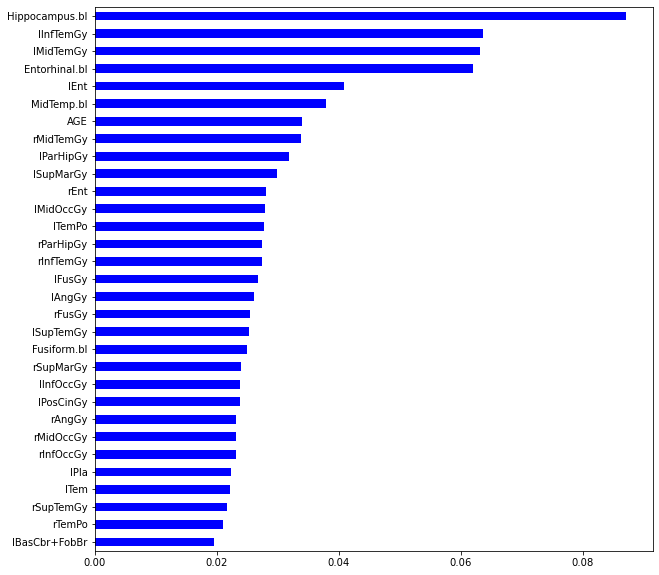

In [109]:
m = rf_model
cols = X_train_top.columns
importances = pd.Series(m.feature_importances_, cols)
plt.figure(figsize = (10,10))
importances.sort_values().plot.barh(color='blue');

# LogisticRegression

In [110]:
lg_model_top = linear_model.LogisticRegression()
lg_model_top.fit(X_train_top,y_train_top)
y_lg_pred_top = lg_model_top.predict(X_test_top)
print(accuracy_score(y_test_top, y_lg_pred_top))
scores_lg_top = cross_val_score(lg_model_top, df_top, df_target, cv=10, scoring = 'accuracy')
print(f'score for {10} folds:', scores_lg_top)
print(scores_lg_top.mean())

/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

0.7666666666666667


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

score for 10 folds: [0.8        0.79259259 0.76296296 0.68888889 0.7037037  0.77777778
 0.78518519 0.73333333 0.71111111 0.7238806 ]
0.747943615257048


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

# XGBoost

In [111]:
xg_model_top = XGBClassifier(n_estimators=150, random_state=42, learning_rate=0.5)

In [112]:
xg_model_top.fit(X_train_top,y_train_top)

/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=40, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
y_xg_pred_top = xg_model_top.predict(X_test_top)

/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [114]:
print(accuracy_score(y_test_top, y_xg_pred_top))

0.9074074074074074


In [115]:
scores_xg = cross_val_score(xg_model_top, df_top, df_target, cv=10,
                         scoring = 'accuracy')
print(f'score for {10} folds: ', scores_xg)

/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score for 10 folds:  [0.84444444 0.97037037 0.82962963 0.82962963 0.88888889 0.96296296
 0.99259259 0.9037037  0.8962963  0.81343284]


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [116]:
scores_xg.mean()

0.8931951354339412

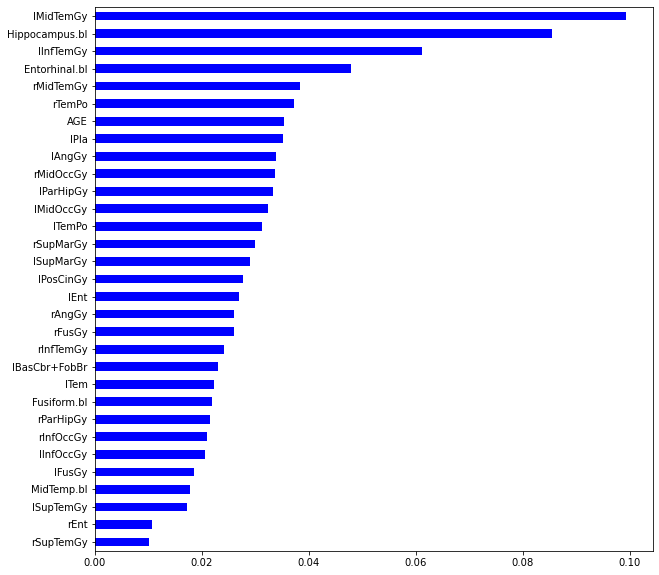

In [117]:
m_xg = xg_model_top
cols_xg = X_train_top.columns
importances_xg = pd.Series(m_xg.feature_importances_, cols_xg)
plt.figure(figsize = (10,10))
importances_xg.sort_values().plot.barh(color='blue');

In [120]:
svm_model_top = svm.SVC(kernel='linear')

In [121]:
svm_model_top.fit(X_train_top, y_train_top)

SVC(kernel='linear')

In [122]:
y_pred_top = svm_model_top.predict(X_test_top)

In [123]:
print(accuracy_score(y_test_top,y_pred_top))

0.7555555555555555


In [124]:
svm_model_top_rbf = svm.SVC(kernel='rbf', C=30, gamma='auto')

In [125]:
svm_model_top_rbf.fit(X_train_top, y_train_top)

SVC(C=30, gamma='auto')

In [126]:
y_pred_top_svm_rbf = svm_model_top_rbf.predict(X_test_top)

In [127]:
print(accuracy_score(y_test_top,y_pred_top_svm_rbf))

0.9444444444444444


In [128]:
scores_svm = cross_val_score(svm_model_top_rbf, df_top, df_target, cv=5,
                         scoring = 'accuracy')
print(f'score for {5} folds: ', scores_svm)

score for 5 folds:  [0.87777778 0.88888889 0.98888889 1.         0.98513011]


In [129]:
scores_svm.mean()

0.9481371334159437

In [130]:
svm_model_top_pl = svm.SVC(kernel='poly')
svm_model_top_pl.fit(X_train_top, y_train_top)
y_pred_top_svm_pl = svm_model_top_pl.predict(X_test_top)
print(accuracy_score(y_test_top,y_pred_top_svm_pl))

0.7444444444444445


In [131]:
scores_svm_pl = cross_val_score(svm_model_top_pl, df_top, df_target, cv=5,
                         scoring = 'accuracy')
print(f'score for {5} folds: ', scores_svm_pl)
print(scores_svm_pl.mean())

score for 5 folds:  [0.78518519 0.72962963 0.70740741 0.75185185 0.64684015]
0.7241828445545918


In [132]:
svm_model_top_sg = svm.SVC(kernel='sigmoid',C=20, gamma='auto')
svm_model_top_sg.fit(X_train_top, y_train_top)
y_pred_top_svm_sg = svm_model_top_sg.predict(X_test_top)
print(accuracy_score(y_test_top,y_pred_top_svm_sg))

0.6259259259259259


In [133]:
scores_svm_sig = cross_val_score(svm_model_top_sg, df_top, df_target, cv=5,
                         scoring = 'accuracy')
print(f'score for {5} folds: ', scores_svm_sig)
print(scores_svm_sig.mean())

score for 5 folds:  [0.63703704 0.63703704 0.64074074 0.64074074 0.6394052 ]
0.6389921520033044


# Gaussian Naive Bayes

In [134]:
gnb = GaussianNB()
gnb.fit(X_train_top, y_train_top)
y_pred_top_gnb = gnb.predict(X_test_top)
print(accuracy_score(y_test_top,y_pred_top_gnb))

0.7148148148148148


In [135]:
scores_gnb = cross_val_score(gnb, df_top, df_target, cv=5,
                         scoring = 'accuracy')
print(f'score for {5} folds: ', scores_gnb)
print(scores_gnb.mean())

score for 5 folds:  [0.74074074 0.64444444 0.71851852 0.73703704 0.6394052 ]
0.6960291890403414


In [136]:
bnb = BernoulliNB()
bnb.fit(X_train_top, y_train_top)
y_pred_top_bnb = bnb.predict(X_test_top)
print(accuracy_score(y_test_top,y_pred_top_bnb))

0.6259259259259259


In [137]:
scores_bnb = cross_val_score(bnb, df_top, df_target, cv=5,
                         scoring = 'accuracy')
print(f'score for {5} folds: ', scores_bnb)
print(scores_bnb.mean())

score for 5 folds:  [0.63703704 0.63703704 0.64074074 0.64074074 0.6394052 ]
0.6389921520033044


In [138]:
mnb = MultinomialNB()
mnb.fit(X_train_top, y_train_top)
y_pred_top_mnb = mnb.predict(X_test_top)
print(accuracy_score(y_test_top,y_pred_top_mnb))

0.6925925925925925


In [139]:
scores_mnb = cross_val_score(mnb, df_top, df_target, cv=5,
                         scoring = 'accuracy')
print(f'score for {5} folds: ', scores_mnb)
print(scores_mnb.mean())

score for 5 folds:  [0.73703704 0.70740741 0.62592593 0.65925926 0.63197026]
0.6723199779705356


In [140]:
X_train_top.shape

(1079, 31)

In [141]:
X_test_top.shape

(270, 31)

# KernelPCA Modeling

In [142]:
from sklearn.decomposition import KernelPCA

In [143]:
df.head()

,names,l3thVen,r3thVen,l4thVen,r4thVen,lAcc,rAcc,lAmy,rAmy,lBst,...,lTemTraGy,rTemTraGy,Classifier,AGE,PTGENDER,Hippocampus.bl,WholeBrain.bl,Entorhinal.bl,Fusiform.bl,MidTemp.bl
0,002_S_5018,0.0375,0.0335,0.0714,0.0686,0.3669,0.3540,0.6013,0.7083,0.2747,...,1.1541,1.0597,AD,73.3,0,7431,1.077908e+06,2910,18214,18684
1,003_S_4152,0.0384,0.0340,0.0671,0.0672,0.3147,0.3206,0.6352,0.7062,0.5595,...,1.1327,0.9901,AD,60.7,0,6696,1.004905e+06,3120,16872,15846
2,003_S_4373,0.0196,0.0165,0.0506,0.0587,0.1784,0.1950,0.4251,0.4827,0.4255,...,0.6465,0.5112,AD,71.1,1,5458,7.545074e+05,2136,11897,12577
3,003_S_4892,0.0230,0.0191,0.0477,0.0597,0.3344,0.3376,0.6638,0.7090,0.8452,...,1.1333,0.8846,AD,75.1,1,6726,9.486256e+05,3128,15315,17518
4,003_S_5165,0.0303,0.0161,0.0333,0.0511,0.2932,0.3143,0.7388,0.6866,0.9777,...,1.2027,0.7114,AD,78.8,0,6269,1.107883e+06,3739,17495,19446


In [144]:
df_f_PCA = df.drop(columns=['names', 'Classifier'], axis=1)

In [145]:
df_f_PCA.head()

,l3thVen,r3thVen,l4thVen,r4thVen,lAcc,rAcc,lAmy,rAmy,lBst,rBst,...,rInfFroAngGy,lTemTraGy,rTemTraGy,AGE,PTGENDER,Hippocampus.bl,WholeBrain.bl,Entorhinal.bl,Fusiform.bl,MidTemp.bl
0,0.0375,0.0335,0.0714,0.0686,0.3669,0.3540,0.6013,0.7083,0.2747,0.5086,...,3.2430,1.1541,1.0597,73.3,0,7431,1.077908e+06,2910,18214,18684
1,0.0384,0.0340,0.0671,0.0672,0.3147,0.3206,0.6352,0.7062,0.5595,0.7528,...,2.5610,1.1327,0.9901,60.7,0,6696,1.004905e+06,3120,16872,15846
2,0.0196,0.0165,0.0506,0.0587,0.1784,0.1950,0.4251,0.4827,0.4255,0.5845,...,2.1805,0.6465,0.5112,71.1,1,5458,7.545074e+05,2136,11897,12577
3,0.0230,0.0191,0.0477,0.0597,0.3344,0.3376,0.6638,0.7090,0.8452,0.8907,...,2.6854,1.1333,0.8846,75.1,1,6726,9.486256e+05,3128,15315,17518
4,0.0303,0.0161,0.0333,0.0511,0.2932,0.3143,0.7388,0.6866,0.9777,1.2133,...,3.5601,1.2027,0.7114,78.8,0,6269,1.107883e+06,3739,17495,19446


In [146]:
df_t_PCA = df[target]

In [147]:
kpca = KernelPCA(n_components = 10, kernel='linear')
X_train = kpca.fit_transform(df_f_PCA)

In [148]:
df_train = kpca.transform(df_f_PCA)

In [149]:
rf_model_pca = RandomForestClassifier(n_estimators=250, random_state=4)
scores_rf_pca = cross_val_score(rf_model_pca, df_train, df_t_PCA, cv=5, scoring = 'accuracy')
#scores_rf_proc = cross_val_score(rf_model_pca, df_train, df_t_PCA, cv=5, scoring = 'roc_auc')
print(f'score for {5} folds:', scores_rf_pca)
print('RF_PCA_mean',scores_rf_pca.mean())
print('RF_PCA_std',scores_rf_pca.std())
#print('RF_PCA_roc_mean',scores_rf_proc.mean())
#print('RF_PCA_roc_std',scores_rf_proc.std())

score for 5 folds: [0.95185185 0.87037037 0.97037037 0.98148148 0.91078067]
RF_PCA_mean 0.9369709486438111
RF_PCA_std 0.041084590668601026


In [150]:
xg_model_pca = XGBClassifier(n_estimators=200, random_state=4, learning_rate=0.5)
scores_xg_pca = cross_val_score(xg_model_pca, df_train, df_t_PCA, cv=5, scoring = 'accuracy')
#scores_xg_proc = cross_val_score(xg_model_pca, df_train, df_t_PCA, cv=5, scoring = 'roc_auc')
print(f'score for {5} folds:', scores_xg_pca)
print('xg_PCA_mean',scores_xg_pca.mean())
print('xg_PCA_std',scores_xg_pca.std())
#print('xg_PCA_roc_mean',scores_xg_proc.mean())
#print('xg_PCA_roc_std',scores_xg_proc.std())

/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score for 5 folds: [0.94814815 0.86666667 0.96666667 0.97407407 0.90334572]
xg_PCA_mean 0.9317802560925237
xg_PCA_std 0.04079715348944033


In [151]:
svm_rbfmodel_pca = svm.SVC(kernel='rbf', C=30, gamma='auto')
scores_svm_pca = cross_val_score(svm_rbfmodel_pca, df_train, df_t_PCA, cv=5, scoring = 'accuracy')
#scores_svm_proc = cross_val_score(svm_rbfmodel_pca, df_train, df_t_PCA, cv=5, scoring = 'roc_auc')
print(f'score for {5} folds:', scores_svm_pca)
print('svm_PCA_mean',scores_svm_pca.mean())
print('svm_PCA_std',scores_svm_pca.std())
#print('svm_PCA_roc_mean',scores_svm_proc.mean())
#print('svm_PCA_roc_std',scores_svm_proc.std())

score for 5 folds: [0.84444444 0.85185185 0.96296296 0.97777778 0.97769517]
svm_PCA_mean 0.9229464408646564
svm_PCA_std 0.06135507252406932


In [152]:
gdb_model_pca = GradientBoostingClassifier(n_estimators=200, learning_rate = 0.8, random_state=1)
scores_gdb_pca = cross_val_score(gdb_model_pca, df_train, df_t_PCA, cv=5, scoring = 'accuracy')
#scores_gdb_proc = cross_val_score(gdb_model_pca, df_train, df_t_PCA, cv=5, scoring = 'roc_auc')
print(f'score for {5} folds:', scores_gdb_pca)
print('GDB_Model_mean', mean(scores_gdb_pca))
print('GDB_Model_std', std(scores_gdb_pca))
#print('GDB_roc_mean',scores_gdb_proc.mean())
#print('GDB_roc_std',scores_gdb_proc.std())

score for 5 folds: [0.94074074 0.87037037 0.95555556 0.96666667 0.91078067]
GDB_Model_mean 0.9288228004956629
GDB_Model_std 0.03473050760001575


In [153]:
clf_pca = DecisionTreeClassifier(criterion='entropy', max_depth=4)
ada_model_pca = AdaBoostClassifier(base_estimator = clf_pca, n_estimators=200, learning_rate=0.8)
scores_ada_pca = cross_val_score(ada_model_pca, df_train, df_t_PCA, cv=5, scoring = 'accuracy')
#scores_ada_proc = cross_val_score(ada_model_pca, df_train, df_t_PCA, cv=5, scoring = 'roc_auc')
print(f'score for {5} folds:', scores_ada_pca)
print('Ada_Model_mean', mean(scores_ada_pca))
print('Ada_Model_std',std(scores_ada_pca))
#print('Ada_roc_mean',scores_ada_proc.mean())
#print('Ada_roc_std',scores_ada_proc.std())

score for 5 folds: [0.94444444 0.85925926 0.96666667 0.97407407 0.90334572]
Ada_Model_mean 0.9295580338703016
Ada_Model_std 0.042916981571913225


# Stacking

In [154]:
from sklearn.ensemble import StackingClassifier

In [155]:
level0 = list()
level0.append(('rf_model', RandomForestClassifier(n_estimators=250,random_state=10)))
level0.append(('rf_model_en', RandomForestClassifier(n_estimators=250,random_state=10, criterion='entropy')))
level0.append(('svm_model', svm.SVC(kernel='rbf', C=30, gamma='auto')))
#level0.append(('GNB_model', GaussianNB()))
level0.append(('Ada_model', AdaBoostClassifier(n_estimators=250,learning_rate=0.5,random_state=42)))
level1 = XGBClassifier(n_estimators=200, learning_rate=0.5)
model_stack = StackingClassifier(estimators=level0, final_estimator=level1)

In [156]:
level0 = list()
level0.append(('rf_model', RandomForestClassifier(n_estimators=250,random_state=10)))
level0.append(('rf_model_en', RandomForestClassifier(n_estimators=250,random_state=10, criterion='entropy')))
level0.append(('xg_model', XGBClassifier(n_estimators=200, learning_rate=0.5)))
#level0.append(('GNB_model', GaussianNB()))
level0.append(('svm_model', svm.SVC(kernel='rbf', C=30, gamma='auto')))
level1 = AdaBoostClassifier(n_estimators=250,learning_rate=0.5,random_state=42)
model2_stack = StackingClassifier(estimators=level0, final_estimator=level1)

In [157]:
# Stacking model for 40 features
scores_stack = cross_val_score(model2_stack, df_f, df_t, cv=5, scoring = 'accuracy')
#scores_stack_roc = cross_val_score(model2_stack, df_f, df_t, cv=5, scoring = 'roc_auc')
print(f'score for {5} folds:', scores_stack)
print('Model_mean', mean(scores_stack))
print('Model_std', std(scores_stack))
#print('Model_roc_mean', mean(scores_stack_roc))
#print('Model_roc_std', std(scores_stack_roc))

/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score for 5 folds: [0.95185185 0.90740741 0.97777778 0.9962963  0.89591078]
Model_mean 0.9458488228004956
Model_std 0.038915273544403516


In [158]:
# Stacking model for PCA
scores_stack_pca = cross_val_score(model2_stack, df_train, df_t_PCA, cv=5, scoring = 'accuracy')
#scores_stack_proc = cross_val_score(model2_stack, df_train, df_t_PCA, cv=5, scoring = 'roc_auc')
print(f'score for {5} folds:', scores_stack_pca)
print('Model_mean', mean(scores_stack_pca))
print('Model_std', std(scores_stack_pca))
#print('Model_roc_mean', mean(scores_stack_proc))
#print('Model_roc_std', std(scores_stack_proc))

/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:36:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/data/users/dverma01/conda/envs/tf1gcolab/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score for 5 folds: [0.92222222 0.85925926 0.98518519 0.99259259 0.92565056]
Model_mean 0.9369819633760154
Model_std 0.048586339901631546
